## Where does the plastic in our oceans come from?

In [58]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

- https://ourworldindata.org/ocean-plastics
- https://theoceancleanup.com/sources/
- https://gramener.com/comicgenfriday/datasets

- https://www.investopedia.com/terms/p/per-capita-gdp.asp

Year - 2019

Country Vs Mismanaged, Emitted to Ocean (Absolute, share)

Country Vs Mismanaged, Emitted to Ocean per capita(Absolute)

River Vs Emitted to Ocean

#### --------
Continent Vs Mismanaged, Emitted to Ocean (Absolute, share)

Continent Vs Mismanaged per capita, Emitted to Ocean  per capita(Absolute)


# plastic-waste

## plastic-waste-mismanaged.csv

In [59]:
df_total = pd.read_csv('data/plastic-waste-mismanaged.csv')
print(df_total.info())
print(df_total.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Entity                                         171 non-null    object
 1   Code                                           160 non-null    object
 2   Year                                           171 non-null    int64 
 3   Mismanaged plastic waste (metric tons year-1)  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB
None
                Entity Code  Year  \
0               Africa  NaN  2019   
1              Albania  ALB  2019   
2              Algeria  DZA  2019   
3               Angola  AGO  2019   
4  Antigua and Barbuda  ATG  2019   

   Mismanaged plastic waste (metric tons year-1)  
0                                       13690104  
1                                          69833  
2              

In [60]:
df_total.rename(columns={'Mismanaged plastic waste (metric tons year-1)':'total_waste'}, inplace=True)
print(f"\nMissing values: {df_total.isnull().sum()}")
print(df_total[df_total['Code'].isnull()])


Missing values: Entity          0
Code           11
Year            0
total_waste     0
dtype: int64
            Entity Code  Year  total_waste
0           Africa  NaN  2019     13690104
6             Asia  NaN  2019     39881167
38           EU-27  NaN  2019       266588
45          Europe  NaN  2019      1180718
86           Macau  NaN  2019        14749
96      Micronesia  NaN  2019          447
107  North America  NaN  2019      1927484
110        Oceania  NaN  2019       136506
128   Saint Martin  NaN  2019            8
137   Sint Maarten  NaN  2019            3
143  South America  NaN  2019      4942514


## plastic-waste-emitted-to-the-ocean.csv

In [61]:
df_ocean = pd.read_csv("data/plastic-waste-emitted-to-the-ocean.csv")
print(df_ocean.info())
df_ocean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Entity                                                      171 non-null    object
 1   Code                                                        160 non-null    object
 2   Year                                                        171 non-null    int64 
 3   Mismanaged waste emitted to the ocean (metric tons year-1)  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB
None


,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1)
0,Africa,NaN,2019,78252
1,Albania,ALB,2019,1565
2,Algeria,DZA,2019,5774
3,Angola,AGO,2019,860
4,Antigua and Barbuda,ATG,2019,2


In [62]:
df_ocean['Year'].value_counts()

2019    171
Name: Year, dtype: int64

In [63]:
df_ocean.rename(columns={'Mismanaged waste emitted to the ocean (metric tons year-1)':'ocean_waste'}, inplace=True)
print(f"\nMissing values: {df_ocean.isnull().sum()}")
print(df_ocean[df_ocean['Code'].isnull()])


Missing values: Entity          0
Code           11
Year            0
ocean_waste     0
dtype: int64
            Entity Code  Year  ocean_waste
0           Africa  NaN  2019        78252
6             Asia  NaN  2019       793298
38           EU-27  NaN  2019         2157
45          Europe  NaN  2019         5832
86           Macau  NaN  2019          341
96      Micronesia  NaN  2019           37
107  North America  NaN  2019        44067
110        Oceania  NaN  2019         3631
128   Saint Martin  NaN  2019            0
137   Sint Maarten  NaN  2019            0
143  South America  NaN  2019        54000


In [64]:

df_ocean.sort_values(by='ocean_waste', ascending=False, inplace=True)
df_ocean.head(10)

,Entity,Code,Year,ocean_waste
168,World,OWID_WRL,2019,979458
6,Asia,NaN,2019,793298
118,Philippines,PHL,2019,356371
66,India,IND,2019,126513
0,Africa,NaN,2019,78252
88,Malaysia,MYS,2019,73098
25,China,CHN,2019,70707
67,Indonesia,IDN,2019,56333
143,South America,NaN,2019,54000
107,North America,NaN,2019,44067


## Merge plastic-waste-mismanaged.csv and plastic-waste-emitted-to-the-ocean.csv

In [65]:
df_mismanaged = df_total.merge(df_ocean, how='inner', on=['Entity','Code','Year'])
df_mismanaged['ocean_waste_%'] = round(100*df_mismanaged['ocean_waste']/df_mismanaged['total_waste'])
print(df_mismanaged.info())
df_mismanaged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         171 non-null    object 
 1   Code           160 non-null    object 
 2   Year           171 non-null    int64  
 3   total_waste    171 non-null    int64  
 4   ocean_waste    171 non-null    int64  
 5   ocean_waste_%  171 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.4+ KB
None


,Entity,Code,Year,total_waste,ocean_waste,ocean_waste_%
0,Africa,NaN,2019,13690104,78252,1.0
1,Albania,ALB,2019,69833,1565,2.0
2,Algeria,DZA,2019,764578,5774,1.0
3,Angola,AGO,2019,236946,860,0.0
4,Antigua and Barbuda,ATG,2019,627,2,0.0


In [66]:
print(f"\nMissing values: {df_mismanaged.isnull().sum()}")
print(df_mismanaged[df_mismanaged['Code'].isnull()])


Missing values: Entity            0
Code             11
Year              0
total_waste       0
ocean_waste       0
ocean_waste_%     0
dtype: int64
            Entity Code  Year  total_waste  ocean_waste  ocean_waste_%
0           Africa  NaN  2019     13690104        78252            1.0
6             Asia  NaN  2019     39881167       793298            2.0
38           EU-27  NaN  2019       266588         2157            1.0
45          Europe  NaN  2019      1180718         5832            0.0
86           Macau  NaN  2019        14749          341            2.0
96      Micronesia  NaN  2019          447           37            8.0
107  North America  NaN  2019      1927484        44067            2.0
110        Oceania  NaN  2019       136506         3631            3.0
128   Saint Martin  NaN  2019            8            0            0.0
137   Sint Maarten  NaN  2019            3            0            0.0
143  South America  NaN  2019      4942514        54000            1.

### Retain only the country data
The dataset also contains information at continent, some areas (Code = NaN) and world level (Code = OWID_WRL). Remove these rows
- Europe &  EU 27: Combine these 2 (TODO)
    - EU 27 - 27 countries that are part of EU
    - Europe - 23 Countries are not part of the European Union

In [67]:
df_ = df_mismanaged[(df_mismanaged['Code'].isnull()) | (df_mismanaged['Code'] == 'OWID_WRL') ]
print(df_.shape[0])
print(df_)

12
            Entity      Code  Year  total_waste  ocean_waste  ocean_waste_%
0           Africa       NaN  2019     13690104        78252            1.0
6             Asia       NaN  2019     39881167       793298            2.0
38           EU-27       NaN  2019       266588         2157            1.0
45          Europe       NaN  2019      1180718         5832            0.0
86           Macau       NaN  2019        14749          341            2.0
96      Micronesia       NaN  2019          447           37            8.0
107  North America       NaN  2019      1927484        44067            2.0
110        Oceania       NaN  2019       136506         3631            3.0
128   Saint Martin       NaN  2019            8            0            0.0
137   Sint Maarten       NaN  2019            3            0            0.0
143  South America       NaN  2019      4942514        54000            1.0
168          World  OWID_WRL  2019     61773700       979458            2.0


In [68]:
from utils import annotate

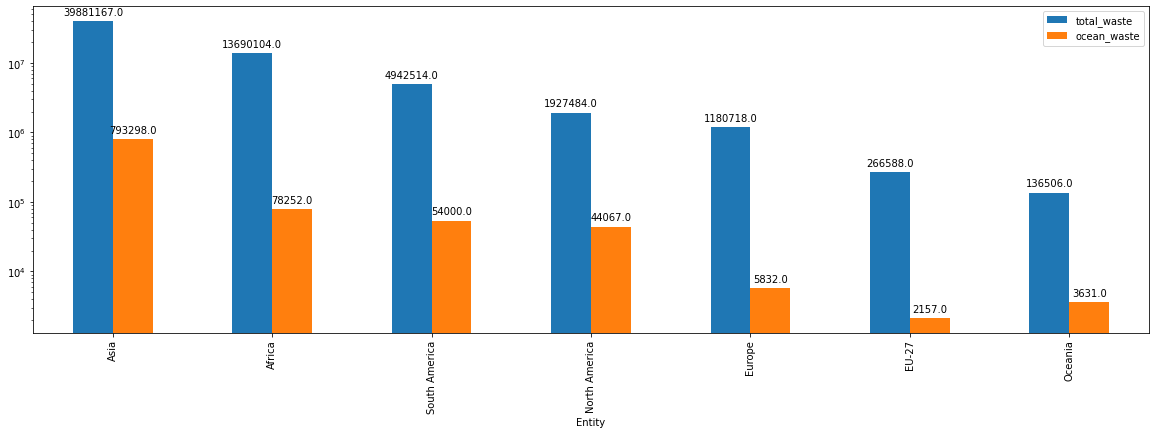

In [69]:
df_mismanaged_continent = df_mismanaged[df_mismanaged['Code'].isnull()].sort_values(by='total_waste', ascending=False)
ax = df_mismanaged_continent[:7].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], logy=True, figsize=(20,6))
annotate(ax)

In [70]:
df_mismanaged_countries = df_mismanaged[~((df_mismanaged['Code'].isnull()) | (df_mismanaged['Code'] == 'OWID_WRL'))]

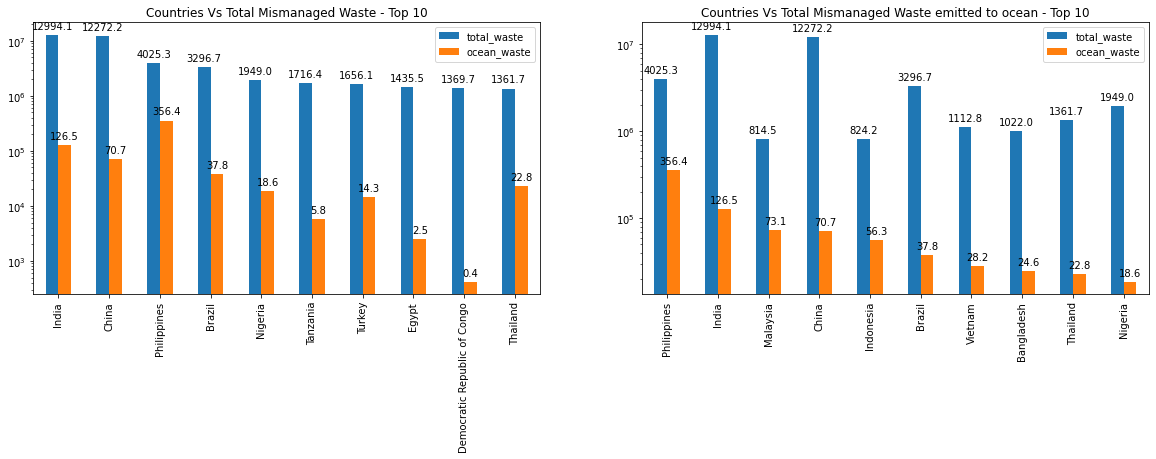

In [71]:
# plot
# TODO: annotate
plt.figure(figsize=(20, 5))

ax = plt.subplot(1,2,1)
ax = df_mismanaged_countries.sort_values(by='total_waste', ascending=False)[:10].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], xlabel='', logy=True, ax=ax)
annotate(ax, 'Countries Vs Total Mismanaged Waste - Top 10', divideby=1000)

ax = plt.subplot(1,2,2)
ax = df_mismanaged_countries.sort_values(by='ocean_waste', ascending=False)[:10].plot.bar(x='Entity', y=['total_waste', 'ocean_waste'], xlabel='', logy=True, ax=ax)
annotate(ax, 'Countries Vs Total Mismanaged Waste emitted to ocean - Top 10', divideby=1000)

plt.show()

In [72]:
top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste', ascending=False)[:10]['Entity'].tolist()
print(top_ocean_waste_countries)

['Philippines', 'India', 'Malaysia', 'China', 'Indonesia', 'Brazil', 'Vietnam', 'Bangladesh', 'Thailand', 'Nigeria']


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_20841/2480162360.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste_%', ascending=False)[df_mismanaged_countries['Entity'].isin(top_ocean_waste_countries)]


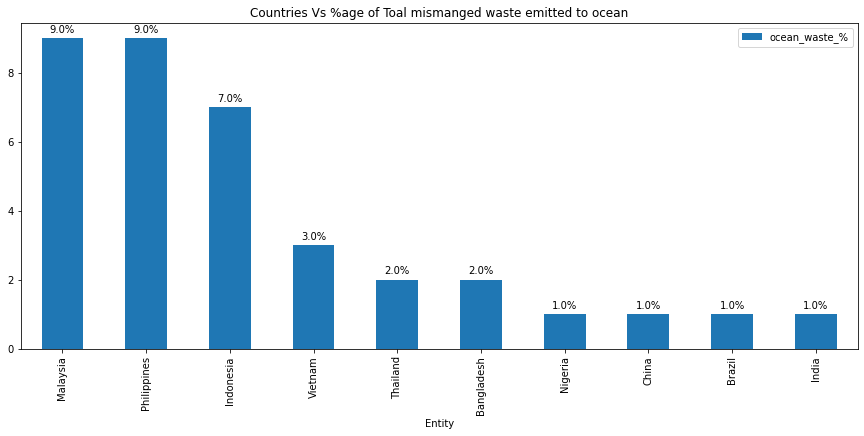

In [73]:
# This should be for the countries that are top ocean wasters
df_top_ocean_waste_countries = df_mismanaged_countries.sort_values(by='ocean_waste_%', ascending=False)[df_mismanaged_countries['Entity'].isin(top_ocean_waste_countries)]
ax = df_top_ocean_waste_countries.plot.bar(x='Entity', y=['ocean_waste_%'], figsize=(15,6))
annotate(ax, 'Countries Vs %age of Toal mismanged waste emitted to ocean', strformat='%')

In [74]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"Type of df_world: {type(df_world)} Active geometry: {df_world.geometry.name}\n")
print(f"Value counts of geometry column: {df_world.geometry.geom_type.value_counts()}\n")
df_world.head()

Type of df_world: <class 'geopandas.geodataframe.GeoDataFrame'> Active geometry: geometry

Value counts of geometry column: Polygon         148
MultiPolygon     29
dtype: int64



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [75]:
print(df_top_ocean_waste_countries.shape)
df_top_ocean_waste_countries_geo = df_world.merge(df_top_ocean_waste_countries, left_on='name', right_on='Entity', how='right')
df_top_ocean_waste_countries_geo['centroid'] = df_top_ocean_waste_countries_geo.centroid
print(df_top_ocean_waste_countries_geo.shape)
print(df_top_ocean_waste_countries_geo.info())
df_top_ocean_waste_countries_geo

(10, 6)
(10, 13)
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pop_est        10 non-null     int64   
 1   continent      10 non-null     object  
 2   name           10 non-null     object  
 3   iso_a3         10 non-null     object  
 4   gdp_md_est     10 non-null     float64 
 5   geometry       10 non-null     geometry
 6   Entity         10 non-null     object  
 7   Code           10 non-null     object  
 8   Year           10 non-null     int64   
 9   total_waste    10 non-null     int64   
 10  ocean_waste    10 non-null     int64   
 11  ocean_waste_%  10 non-null     float64 
 12  centroid       10 non-null     geometry
dtypes: float64(2), geometry(2), int64(4), object(5)
memory usage: 1.1+ KB
None


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_20841/4209306226.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_top_ocean_waste_countries_geo['centroid'] = df_top_ocean_waste_countries_geo.centroid


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,total_waste,ocean_waste,ocean_waste_%,centroid
0,31381992,Asia,Malaysia,MYS,863000.0,"MULTIPOLYGON (((100.08576 6.46449, 100.25960 6...",Malaysia,MYS,2019,814454,73098,9.0,POINT (109.69815 3.72559)
1,104256076,Asia,Philippines,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",Philippines,PHL,2019,4025300,356371,9.0,POINT (122.90267 11.76380)
2,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,IDN,2019,824234,56333,7.0,POINT (117.42341 -2.22174)
3,96160163,Asia,Vietnam,VNM,594900.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",Vietnam,VNM,2019,1112790,28221,3.0,POINT (106.28584 16.65794)
4,68414135,Asia,Thailand,THA,1161000.0,"POLYGON ((105.21878 14.27321, 104.28142 14.416...",Thailand,THA,2019,1361690,22806,2.0,POINT (101.00613 15.01697)
5,157826578,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",Bangladesh,BGD,2019,1021990,24640,2.0,POINT (90.26793 23.83946)
6,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",Nigeria,NGA,2019,1948950,18640,1.0,POINT (7.99513 9.54832)
7,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,CHN,2019,12272200,70707,1.0,POINT (103.88361 36.55507)
8,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,BRA,2019,3296700,37799,1.0,POINT (-53.05434 -10.80677)
9,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,IND,2019,12994100,126513,1.0,POINT (79.59370 22.92501)


In [76]:
print(df_mismanaged_countries.shape)
df_mismanaged_countries_geo = df_world.merge(df_mismanaged_countries, left_on='name', right_on='Entity', how='inner')
df_mismanaged_countries_geo['centroid'] = df_mismanaged_countries_geo.centroid
print(df_mismanaged_countries_geo.info())
print(df_mismanaged_countries_geo.shape)
df_mismanaged_countries_geo

(159, 6)
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pop_est        123 non-null    int64   
 1   continent      123 non-null    object  
 2   name           123 non-null    object  
 3   iso_a3         123 non-null    object  
 4   gdp_md_est     123 non-null    float64 
 5   geometry       123 non-null    geometry
 6   Entity         123 non-null    object  
 7   Code           123 non-null    object  
 8   Year           123 non-null    int64   
 9   total_waste    123 non-null    int64   
 10  ocean_waste    123 non-null    int64   
 11  ocean_waste_%  123 non-null    float64 
 12  centroid       123 non-null    geometry
dtypes: float64(2), geometry(2), int64(4), object(5)
memory usage: 13.5+ KB
None
(123, 13)


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_20841/891184043.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_mismanaged_countries_geo['centroid'] = df_mismanaged_countries_geo.centroid


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,total_waste,ocean_waste,ocean_waste_%,centroid
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2019,3858,365,9.0,POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2019,1716400,5785,0.0,POINT (34.75299 -6.25773)
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2019,23587,238,1.0,POINT (-98.14238 61.46908)
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,2019,54242,13,0.0,POINT (67.28461 48.19166)
4,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,PNG,2019,119538,3059,3.0,POINT (145.31757 -6.45164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,EGY,2019,1435510,2471,0.0,POINT (29.84446 26.50662)
119,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((25.00000 22.00000, 25.00000 20.00304...",Libya,LBY,2019,188535,879,0.0,POINT (17.97435 26.99746)
120,865267,Africa,Djibouti,DJI,3345.0,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",Djibouti,DJI,2019,10289,4,0.0,POINT (42.49802 11.77304)
121,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,MNE,2019,16,0,0.0,POINT (19.28618 42.78904)


In [ ]:
print(df_mismanaged_countries.shape)
df_mismanaged_countries_geo = df_world.merge(df_mismanaged_countries, left_on='name', right_on='Entity', how='inner')
df_mismanaged_countries_geo['centroid'] = df_mismanaged_countries_geo.centroid
print(df_mismanaged_countries_geo.info())
print(df_mismanaged_countries_geo.shape)
df_mismanaged_countries_geo

Text(0.5, 1.0, 'Countries Vs Total mismanaged waste')

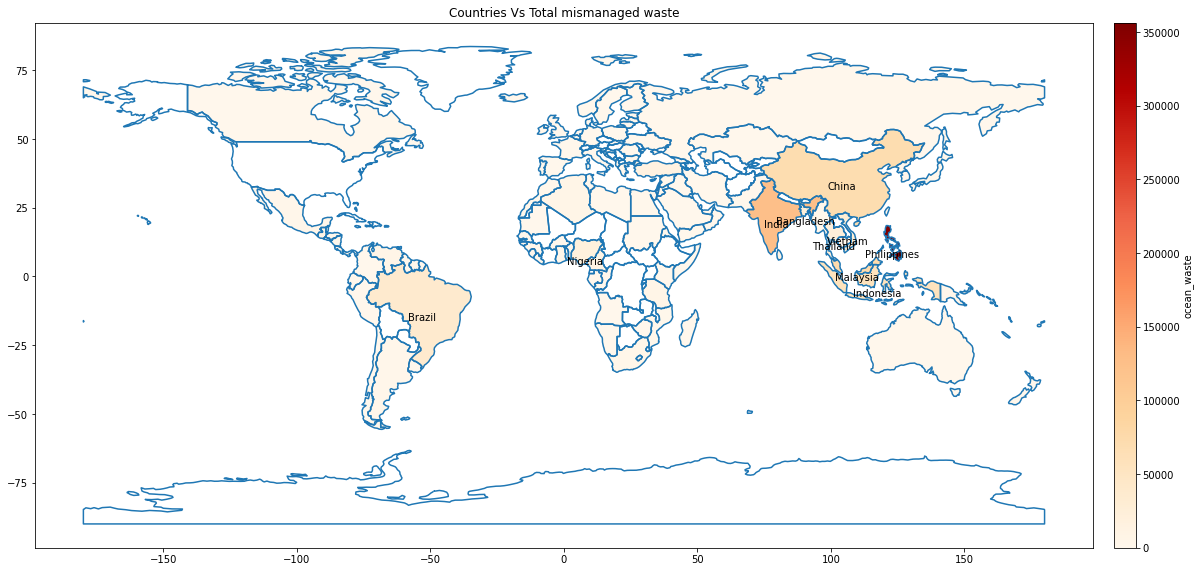

In [78]:
from utils import addColorbar

ax, cax = addColorbar()
ax = df_world["geometry"].boundary.plot(ax=ax, figsize=(20,16))
df_mismanaged_countries_geo.plot( column="ocean_waste", ax=ax, cax=cax, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "ocean_waste"})
df_top_ocean_waste_countries_geo.apply(lambda x: ax.annotate(text=x['Entity'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)                    
ax.set_title("Countries Vs Total mismanaged waste")

- TODO: Show zoomed view of Asia

## plastics-top-rivers.csv

In [ ]:
df_rivers = pd.read_csv("data/plastics-top-rivers.csv")
print(df_rivers.info())
df_rivers.head()

In [ ]:
df_rivers['Year'].value_counts()

In [ ]:
df_rivers['Entity'][0:10]

In [ ]:
def getCountry(entity):
    if '(' in entity and ') in entity':
        return entity.split('(')[1].split(')')[0]
    else:
        return '-'

df_rivers['country'] = df_rivers['Entity'].apply(lambda x: getCountry(x))
df_rivers.head(10)

In [ ]:
df_rivers.rename(columns={'Share of global plastics emitted to ocean':'plastics'}, inplace=True)
df_rivers.sort_values(by='plastics', ascending=False, inplace=True)
df_rivers.head(10)

In [ ]:
df_rivers[df_rivers['country']=='-']

In [ ]:
df_rivers[:10].plot.bar(x='Entity', y='plastics', logy=True, figsize=(20,6))

In [ ]:
df_rivers_country = df_rivers.groupby(by='country').agg({'plastics':np.sum}).sort_values(by='plastics', ascending=False)
df_rivers_country

In [ ]:
df_rivers_country[:10].plot.bar(logy=True, figsize=(20,6))

## total waste emitted to the ocean : waste from rivers

# plastic-waste-per-capita

## ocean-plastic-waste-per-capita-vs-gdp.csv

In [ ]:
df_gdp = pd.read_csv('data/ocean-plastic-waste-per-capita-vs-gdp.csv')
df_gdp = df_gdp[(df_gdp['Year']==2019) & (~(df_gdp['Code'].isnull())) & (df_gdp['Entity']!='World')]
df_gdp.reset_index(inplace=True)
df_gdp.drop(columns=['index', 'Continent'],inplace=True)
df_gdp.rename(columns={'Mismanaged plastic waste to ocean per capita (kg per year)':'waste_per_capita', 'GDP per capita, PPP (constant 2017 international $)':'gdp'}, inplace=True)
print(df_gdp.info())
df_gdp.head()

In [ ]:
df_gdp[df_gdp['waste_per_capita'].isnull()].shape

Merge the df_waste, df_gdp

In [ ]:
df_waste_gdp = df_waste.merge(df_gdp, how='inner', on='Entity')
print(df_waste_gdp.info())
df_waste_gdp.head()

In [ ]:
plt.figure(figsize=(20, 16))

ax = plt.subplot(3,3,1)
ax = df_waste_gdp.sort_values(by='waste', ascending=False)[:5].plot.bar(x='Entity', y='waste', ax=ax)
annotate(ax)

ax = plt.subplot(3,3,2)
df_waste_gdp.sort_values(by='waste_per_capita', ascending=False)[:5].plot.bar(x='Entity', y='waste_per_capita', ax=ax)
annotate(ax)

ax = plt.subplot(3,3,3)
ax = df_waste_gdp.sort_values(by='gdp', ascending=True)[:5].plot.bar(x='Entity', y='gdp', ax=ax)
annotate(ax)

plt.show()

In [ ]:
df_waste_gdp.sort_values(by='waste', ascending=False)[:5]

In [ ]:
df_waste_gdp.sort_values(by='gdp', ascending=False)[:5]